# Autoregressive Integrated Moving Average

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15,6
from datetime import datetime

In [5]:
data = pd.read_csv('ALL_MONTHS_FINAL.csv')
print(data.head())
print("\nData Types: ")
print(data.dtypes)

   Unnamed: 0            period  Year  Month  Day  Hour      AP    C6    CO  \
0           0  01-01-2016 00:00  2016      1    1     0  953.25  0.46  1.51   
1           1  01-01-2016 01:00  2016      1    1     1  952.98  0.27  1.22   
2           2  01-01-2016 02:00  2016      1    1     2  952.69  0.14  1.05   
3           3  01-01-2016 03:00  2016      1    1     3  952.45  0.17  0.98   
4           4  01-01-2016 04:00  2016      1    1     4  952.43  0.12  0.93   

      NO  ...    PM25   RF     RH     RT    SO2    SR   TOL     WD    WS   XYL  
0  20.11  ...   75.25  0.0  58.18  17.72  40.58  0.11  3.23  16.39  0.41  2.35  
1  20.50  ...  101.77  0.0  61.08  16.91  40.46  0.02  2.18  16.33  0.53  1.53  
2  20.89  ...   83.33  0.0  62.52  16.43  38.97  0.01  1.65  16.30  0.45  1.08  
3  21.09  ...   61.98  0.0  64.72  15.66  39.07  0.00  1.30  16.25  0.29  0.76  
4  21.21  ...   69.20  0.0  68.06  14.93  39.65  0.00  1.15  16.23  0.28  0.60  

[5 rows x 24 columns]

Data Types: 
Un

In [6]:
data.drop('Unnamed: 0',axis = 1, inplace = True)

In [7]:
data.head()

,period,Year,Month,Day,Hour,AP,C6,CO,NO,NO2,...,PM25,RF,RH,RT,SO2,SR,TOL,WD,WS,XYL
0,01-01-2016 00:00,2016,1,1,0,953.25,0.46,1.51,20.11,68.99,...,75.25,0.0,58.18,17.72,40.58,0.11,3.23,16.39,0.41,2.35
1,01-01-2016 01:00,2016,1,1,1,952.98,0.27,1.22,20.50,68.79,...,101.77,0.0,61.08,16.91,40.46,0.02,2.18,16.33,0.53,1.53
2,01-01-2016 02:00,2016,1,1,2,952.69,0.14,1.05,20.89,66.25,...,83.33,0.0,62.52,16.43,38.97,0.01,1.65,16.30,0.45,1.08
3,01-01-2016 03:00,2016,1,1,3,952.45,0.17,0.98,21.09,66.43,...,61.98,0.0,64.72,15.66,39.07,0.00,1.30,16.25,0.29,0.76
4,01-01-2016 04:00,2016,1,1,4,952.43,0.12,0.93,21.21,67.40,...,69.20,0.0,68.06,14.93,39.65,0.00,1.15,16.23,0.28,0.60


In [8]:
data = data.set_index('period')

In [9]:
data.head()

,Year,Month,Day,Hour,AP,C6,CO,NO,NO2,NOX,...,PM25,RF,RH,RT,SO2,SR,TOL,WD,WS,XYL
period,,,,,,,,,,,,,,,,,,,,,
01-01-2016 00:00,2016,1,1,0,953.25,0.46,1.51,20.11,68.99,89.10,...,75.25,0.0,58.18,17.72,40.58,0.11,3.23,16.39,0.41,2.35
01-01-2016 01:00,2016,1,1,1,952.98,0.27,1.22,20.50,68.79,89.29,...,101.77,0.0,61.08,16.91,40.46,0.02,2.18,16.33,0.53,1.53
01-01-2016 02:00,2016,1,1,2,952.69,0.14,1.05,20.89,66.25,87.13,...,83.33,0.0,62.52,16.43,38.97,0.01,1.65,16.30,0.45,1.08
01-01-2016 03:00,2016,1,1,3,952.45,0.17,0.98,21.09,66.43,87.51,...,61.98,0.0,64.72,15.66,39.07,0.00,1.30,16.25,0.29,0.76
01-01-2016 04:00,2016,1,1,4,952.43,0.12,0.93,21.21,67.40,88.61,...,69.20,0.0,68.06,14.93,39.65,0.00,1.15,16.23,0.28,0.60


# Giving all the months a seperate variable

In [10]:
JAN = data.iloc[:744,:]
FEB = data.iloc[744:1440,:]
MAR = data.iloc[1440:2184,:]
APR = data.iloc[2184:2904,:]
MAY = data.iloc[2904:3648,:]
JUN = data.iloc[3648:4368,:]
JUL = data.iloc[4368:5112,:]
AUG = data.iloc[5112:5856,:]
SEP = data.iloc[5856:6576,:]
OCT = data.iloc[6576:7320,:]
NOV = data.iloc[7320:8040,:]
DEC = data.iloc[8040:8784,:]

# Following is a function that will apply the dickey fuller test for stationarity of our data

In [11]:
from statsmodels.tsa.stattools import adfuller
def teststationarity(timeseries):
    
    #determining rolling stats
    rolmean = timeseries.rolling(24).mean()
    rolstd = timeseries.rolling(24).std()
    #print(rolmean)
    #print(rolstd)
    
    #plotting rolling mean data
    orig = plt.plot(timeseries, color='blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling standard')
    plt.legend(loc = 'best')
    plt.title("Rolling mean")
    plt.xticks(np.arange(0, 8764, 1464.0))
    plt.show(block = False)
    
    #applying dickey fuller test
    print("Results of Dickey Fuller Test: ")
    dftest = adfuller(timeseries,autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
#teststationarity(ts)

In [12]:
rough_set = JAN

# We try to observe a pattern in one of the parameters in our dataset

In [13]:
jan_ap = rough_set.loc[:,['AP']]
jan_ap.head()

,AP
period,
01-01-2016 00:00,953.25
01-01-2016 01:00,952.98
01-01-2016 02:00,952.69
01-01-2016 03:00,952.45
01-01-2016 04:00,952.43


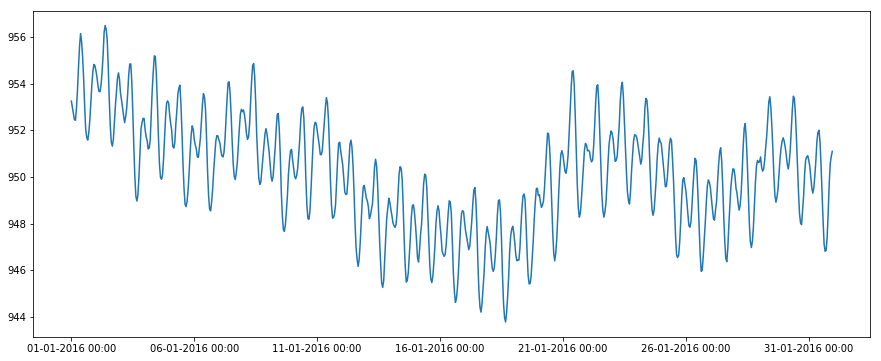

In [14]:
plt.plot(jan_ap)
plt.xticks(np.arange(0, 744, 120.0))
plt.show()

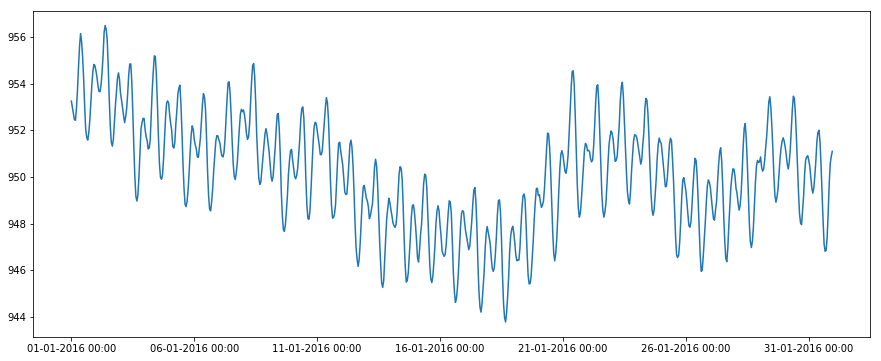

In [15]:
jan_ap_log = np.log(jan_ap)
plt.plot(jan_ap)
plt.xticks(np.arange(0, 744, 120.0))
plt.show()

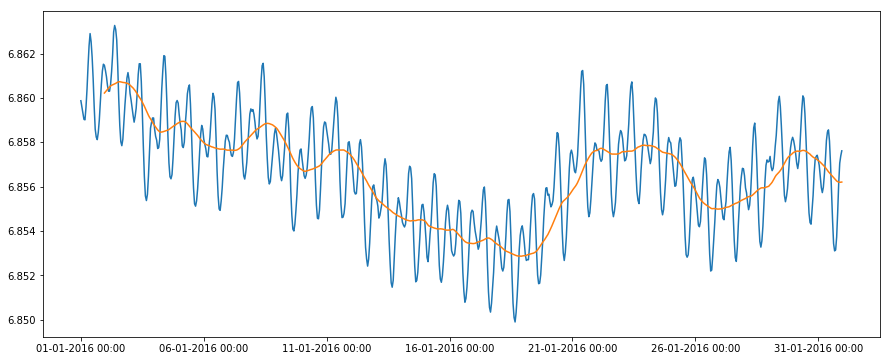

In [16]:
moving_avg = jan_ap_log.rolling(24).mean()
plt.plot(jan_ap_log)
plt.plot(moving_avg)
plt.xticks(np.arange(0, 744, 120.0))
plt.show()

In [17]:
jan_ap_log_ma_diff = jan_ap_log - moving_avg
jan_ap_log_ma_diff.head(24)

,AP
period,
01-01-2016 00:00,NaN
01-01-2016 01:00,NaN
01-01-2016 02:00,NaN
01-01-2016 03:00,NaN
01-01-2016 04:00,NaN
01-01-2016 05:00,NaN
01-01-2016 06:00,NaN
01-01-2016 07:00,NaN
01-01-2016 08:00,NaN


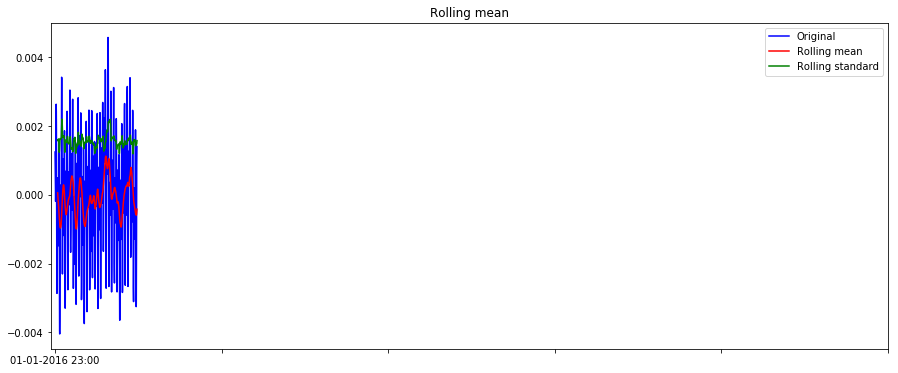

Results of Dickey Fuller Test: 
Test Statistic                  -2.175064
p-value                          0.215420
#Lags Used                      19.000000
Number of Observations Used    701.000000
Critical Value (1%)             -3.439713
Critical Value (5%)             -2.865672
Critical Value (10%)            -2.568970
dtype: float64


In [18]:
jan_ap_log_ma_diff.dropna(inplace=True)
teststationarity(jan_ap_log_ma_diff['AP'])

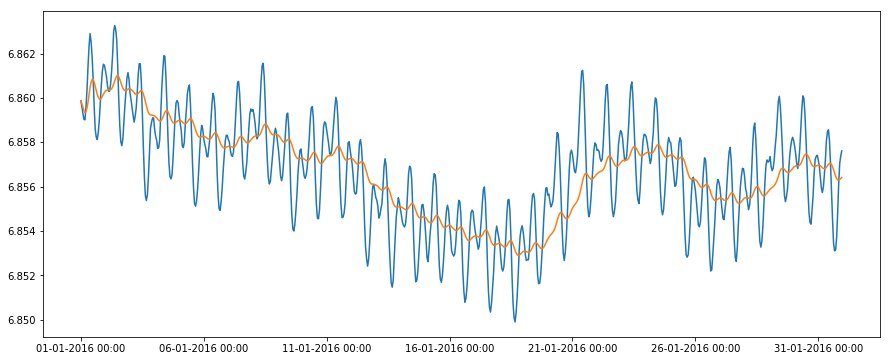

In [19]:
jan_ap_ewma = jan_ap_log.ewm(24).mean()
plt.plot(jan_ap_log)
plt.plot(jan_ap_ewma)
plt.xticks(np.arange(0, 744, 120.0))
plt.show()

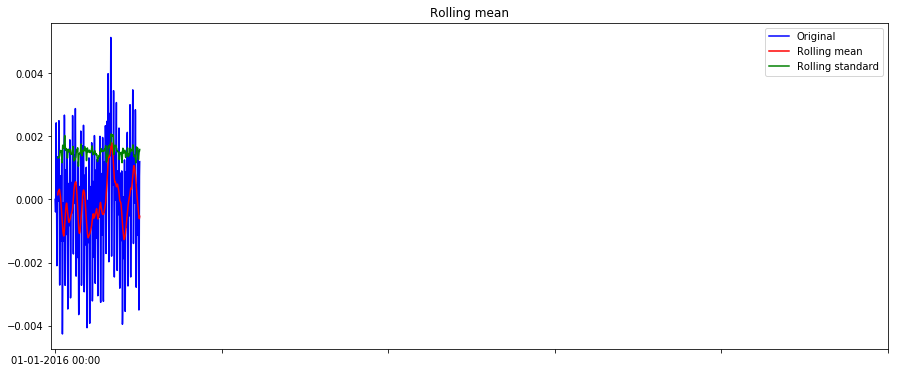

Results of Dickey Fuller Test: 
Test Statistic                  -1.555446
p-value                          0.505927
#Lags Used                      19.000000
Number of Observations Used    724.000000
Critical Value (1%)             -3.439414
Critical Value (5%)             -2.865540
Critical Value (10%)            -2.568900
dtype: float64


In [20]:
jan_ap_log_ewmadiff = jan_ap_log - jan_ap_ewma
teststationarity(jan_ap_log_ewmadiff['AP'])

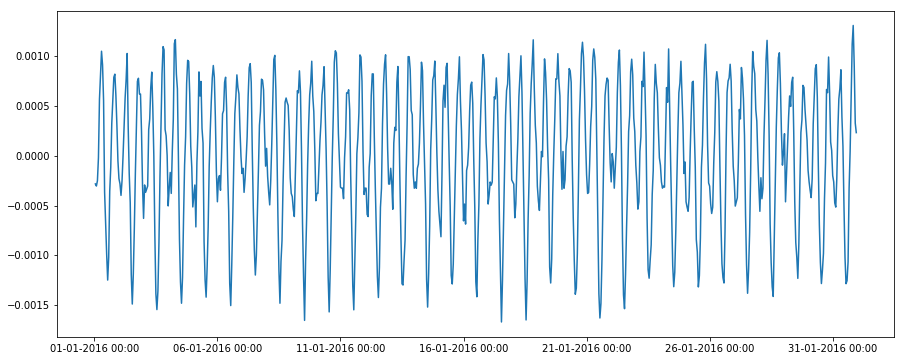

In [21]:
jan_ap_log_shift = jan_ap_log - jan_ap_log.shift(periods = 1)
plt.plot(jan_ap_log_shift)
plt.xticks(np.arange(0, 744, 120.0))
plt.show()

# Best result

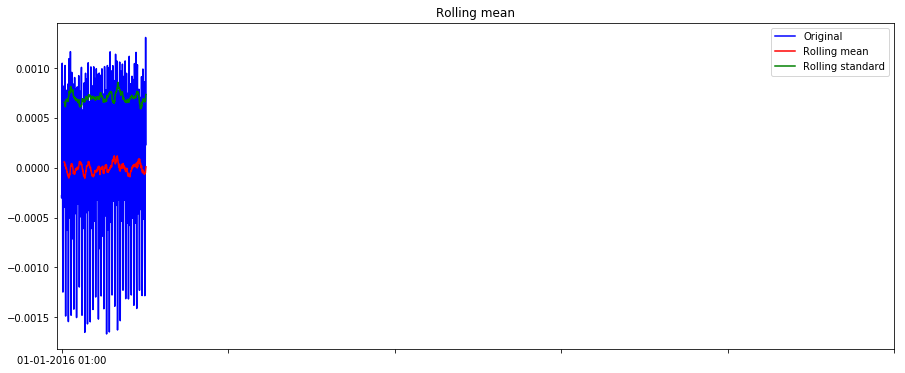

Results of Dickey Fuller Test: 
Test Statistic                -9.587677e+00
p-value                        2.076111e-16
#Lags Used                     2.000000e+01
Number of Observations Used    7.220000e+02
Critical Value (1%)           -3.439440e+00
Critical Value (5%)           -2.865551e+00
Critical Value (10%)          -2.568906e+00
dtype: float64


In [22]:
jan_ap_log_shift.dropna(inplace=True)
teststationarity(jan_ap_log_shift['AP'])

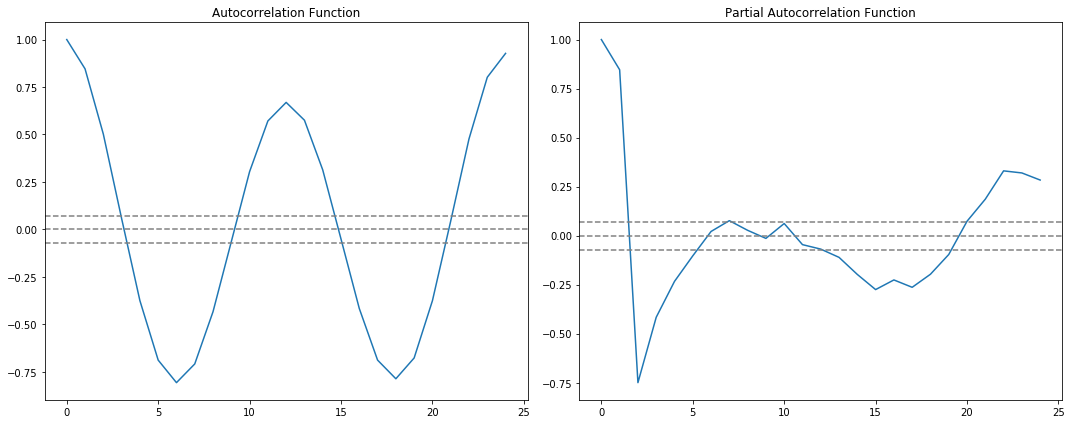

In [23]:
#ACF and PACF plots
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(jan_ap_log_shift, nlags = 24)
lag_pacf = pacf(jan_ap_log_shift, nlags = 24, method='ols')

#Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(jan_ap_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(jan_ap_log_shift)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(jan_ap_log_shift)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(jan_ap_log_shift)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [24]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(jan_ap_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1) 

E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
E:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


([<matplotlib.axis.XTick at 0x1e79fab58d0>,
 <a list of 7 Text xticklabel objects>)

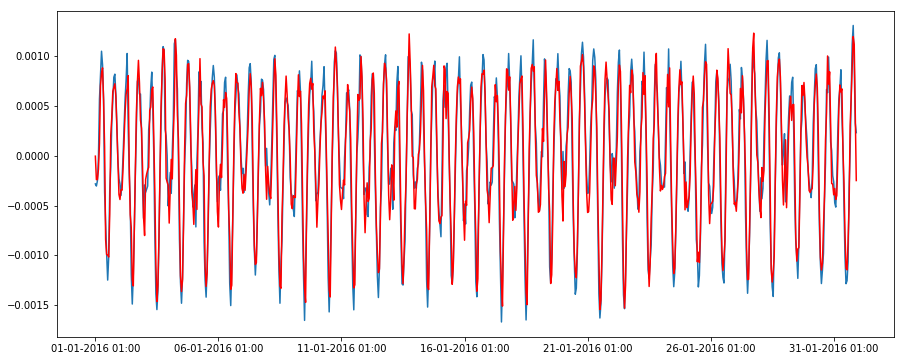

In [25]:
plt.plot(jan_ap_log_shift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.xticks(np.arange(0, 744, 120.0))
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-jan_ap_log_shift)**2))

In [26]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

period
01-01-2016 01:00   -0.000005
01-01-2016 02:00   -0.000240
01-01-2016 03:00   -0.000239
01-01-2016 04:00   -0.000137
01-01-2016 05:00    0.000124
dtype: float64


In [27]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

period
01-01-2016 01:00   -0.000005
01-01-2016 02:00   -0.000245
01-01-2016 03:00   -0.000485
01-01-2016 04:00   -0.000622
01-01-2016 05:00   -0.000498
dtype: float64


In [28]:
#jan_ap_log.iloc[0] = 6.859877
predictions_ARIMA_log = pd.Series(6.859877, index=jan_ap_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

period
01-01-2016 00:00    6.859877
01-01-2016 01:00    6.859872
01-01-2016 02:00    6.859632
01-01-2016 03:00    6.859392
01-01-2016 04:00    6.859255
dtype: float64

In [29]:
from sklearn.base import BaseEstimator, RegressorMixin
import statsmodels.formula.api as smf
import statsmodels.api as sm

class statsmodel(BaseEstimator, RegressorMixin):
    def __init__(self, sm_class, formula):
        self.sm_class = sm_class
        self.formula = formula
        self.model = None
        self.result = None

    def fit(self,data,dummy):
        self.model = self.sm_class(self.formula,data)
        self.result = self.model.fit()

    def predict(self,X):
        return self.result.predict(X)

Test score Accuracy: 0.7286294160894677


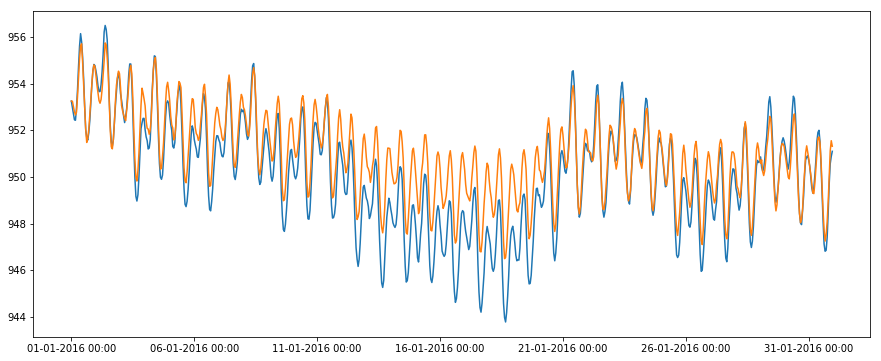

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(jan_ap)
plt.plot(predictions_ARIMA)
plt.xticks(np.arange(0, 744, 120.0))
print ("Test score Accuracy:", r2_score(jan_ap, predictions_ARIMA))

In [31]:
import itertools
import warnings
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 1) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 1)
SARIMAX: (0, 0, 1) x (0, 0, 2, 1)
SARIMAX: (0, 0, 2) x (0, 1, 0, 1)
SARIMAX: (0, 0, 2) x (0, 1, 1, 1)


In [32]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(jan_ap_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 1)12 - AIC:4971.406217773549
ARIMA(0, 0, 0)x(0, 0, 1, 1)12 - AIC:3945.6958246350887
ARIMA(0, 0, 0)x(0, 0, 2, 1)12 - AIC:3955.716751001612
ARIMA(0, 0, 0)x(0, 1, 0, 1)12 - AIC:-8690.54526765372
ARIMA(0, 0, 0)x(0, 1, 1, 1)12 - AIC:-9373.810875198296
ARIMA(0, 0, 0)x(0, 1, 2, 1)12 - AIC:-9404.083554045714
ARIMA(0, 0, 0)x(0, 2, 0, 1)12 - AIC:-9549.924050818994
ARIMA(0, 0, 0)x(0, 2, 1, 1)12 - AIC:-9740.493897643686
ARIMA(0, 0, 0)x(0, 2, 2, 1)12 - AIC:-9848.191195276531
ARIMA(0, 0, 0)x(1, 0, 0, 1)12 - AIC:-8701.1099594143
ARIMA(0, 0, 0)x(1, 0, 1, 1)12 - AIC:-9336.543469823426
ARIMA(0, 0, 0)x(1, 0, 2, 1)12 - AIC:-9519.428262188203
ARIMA(0, 0, 0)x(1, 1, 0, 1)12 - AIC:-9621.322437351057
ARIMA(0, 0, 0)x(1, 1, 1, 1)12 - AIC:-9855.77994107415
ARIMA(0, 0, 0)x(1, 1, 2, 1)12 - AIC:-9808.4174336373
ARIMA(0, 0, 0)x(1, 2, 0, 1)12 - AIC:-9899.59019643164
ARIMA(0, 0, 0)x(1, 2, 1, 1)12 - AIC:-9885.793724685307
ARIMA(0, 0, 0)x(1, 2, 2, 1)12 - AIC:-9679.37499518006
ARIMA(0, 0, 0)x(2, 0

ARIMA(0, 1, 2)x(1, 2, 0, 1)12 - AIC:-9693.081760811969
ARIMA(0, 1, 2)x(1, 2, 1, 1)12 - AIC:-9680.56439654361
ARIMA(0, 1, 2)x(1, 2, 2, 1)12 - AIC:-9612.226918597982
ARIMA(0, 1, 2)x(2, 0, 0, 1)12 - AIC:-8225.664365024119
ARIMA(0, 1, 2)x(2, 0, 1, 1)12 - AIC:-8457.801619451602
ARIMA(0, 1, 2)x(2, 0, 2, 1)12 - AIC:-8573.319529764833
ARIMA(0, 1, 2)x(2, 1, 0, 1)12 - AIC:-9745.080162409111
ARIMA(0, 1, 2)x(2, 1, 1, 1)12 - AIC:-7684.718347956088
ARIMA(0, 1, 2)x(2, 1, 2, 1)12 - AIC:-9850.778402276706
ARIMA(0, 1, 2)x(2, 2, 0, 1)12 - AIC:-9694.824278464781
ARIMA(0, 1, 2)x(2, 2, 1, 1)12 - AIC:-9679.360804073436
ARIMA(0, 1, 2)x(2, 2, 2, 1)12 - AIC:-8407.053941596581
ARIMA(0, 2, 0)x(0, 0, 0, 1)12 - AIC:-9549.924050818994
ARIMA(0, 2, 0)x(0, 0, 1, 1)12 - AIC:-9740.493897643686
ARIMA(0, 2, 0)x(0, 0, 2, 1)12 - AIC:-9848.191195276531
ARIMA(0, 2, 0)x(0, 1, 0, 1)12 - AIC:-9728.981373016213
ARIMA(0, 2, 0)x(0, 1, 1, 1)12 - AIC:-9723.155704193585
ARIMA(0, 2, 0)x(0, 1, 2, 1)12 - AIC:-9713.751885440015
ARIMA(0, 2,

ARIMA(1, 0, 2)x(0, 1, 1, 1)12 - AIC:-9310.026283713738
ARIMA(1, 0, 2)x(0, 1, 2, 1)12 - AIC:-8708.205206681634
ARIMA(1, 0, 2)x(0, 2, 0, 1)12 - AIC:-9679.37499518006
ARIMA(1, 0, 2)x(0, 2, 1, 1)12 - AIC:-9521.998598764658
ARIMA(1, 0, 2)x(0, 2, 2, 1)12 - AIC:-9793.934326245195
ARIMA(1, 0, 2)x(1, 0, 0, 1)12 - AIC:-8887.034346529617
ARIMA(1, 0, 2)x(1, 0, 1, 1)12 - AIC:-8480.689938295021
ARIMA(1, 0, 2)x(1, 0, 2, 1)12 - AIC:-9807.878721832956
ARIMA(1, 0, 2)x(1, 1, 0, 1)12 - AIC:-9872.739240742816
ARIMA(1, 0, 2)x(1, 1, 1, 1)12 - AIC:-9613.726969967964
ARIMA(1, 0, 2)x(1, 1, 2, 1)12 - AIC:-9733.993852410229
ARIMA(1, 0, 2)x(1, 2, 0, 1)12 - AIC:-9756.516758284128
ARIMA(1, 0, 2)x(1, 2, 1, 1)12 - AIC:-9728.32564605131
ARIMA(1, 0, 2)x(1, 2, 2, 1)12 - AIC:-9684.368679507108
ARIMA(1, 0, 2)x(2, 0, 0, 1)12 - AIC:-8759.985390797705
ARIMA(1, 0, 2)x(2, 0, 1, 1)12 - AIC:-10020.226304366002
ARIMA(1, 0, 2)x(2, 0, 2, 1)12 - AIC:-9726.799740834751
ARIMA(1, 0, 2)x(2, 1, 0, 1)12 - AIC:-9402.61645928139
ARIMA(1, 0, 

ARIMA(1, 2, 1)x(2, 0, 2, 1)12 - AIC:-9720.718731890309
ARIMA(1, 2, 1)x(2, 1, 0, 1)12 - AIC:-9698.633557819245
ARIMA(1, 2, 1)x(2, 1, 1, 1)12 - AIC:-9696.326808852198
ARIMA(1, 2, 1)x(2, 1, 2, 1)12 - AIC:-8420.850132018702
ARIMA(1, 2, 1)x(2, 2, 0, 1)12 - AIC:-9160.640270939959
ARIMA(1, 2, 1)x(2, 2, 1, 1)12 - AIC:-9116.628851280717
ARIMA(1, 2, 1)x(2, 2, 2, 1)12 - AIC:-8472.385853206988
ARIMA(1, 2, 2)x(0, 0, 0, 1)12 - AIC:-9679.37499518006
ARIMA(1, 2, 2)x(0, 0, 1, 1)12 - AIC:-9521.998598764658
ARIMA(1, 2, 2)x(0, 0, 2, 1)12 - AIC:-9793.934326245195
ARIMA(1, 2, 2)x(0, 1, 0, 1)12 - AIC:-9669.760801878037
ARIMA(1, 2, 2)x(0, 1, 1, 1)12 - AIC:-9631.635302941364
ARIMA(1, 2, 2)x(0, 1, 2, 1)12 - AIC:-9612.203283664343
ARIMA(1, 2, 2)x(0, 2, 0, 1)12 - AIC:-9522.499739934017
ARIMA(1, 2, 2)x(0, 2, 1, 1)12 - AIC:-9228.050550417936
ARIMA(1, 2, 2)x(0, 2, 2, 1)12 - AIC:-9017.69263862731
ARIMA(1, 2, 2)x(1, 0, 0, 1)12 - AIC:-9756.516758284128
ARIMA(1, 2, 2)x(1, 0, 1, 1)12 - AIC:-9728.32564605131
ARIMA(1, 2, 2

ARIMA(2, 1, 1)x(1, 0, 0, 1)12 - AIC:-9894.244844327064
ARIMA(2, 1, 1)x(1, 0, 1, 1)12 - AIC:-9560.40565796319
ARIMA(2, 1, 1)x(1, 0, 2, 1)12 - AIC:-9700.358676635069
ARIMA(2, 1, 1)x(1, 1, 0, 1)12 - AIC:-7584.038776051941
ARIMA(2, 1, 1)x(1, 1, 1, 1)12 - AIC:nan
ARIMA(2, 1, 1)x(1, 1, 2, 1)12 - AIC:-7669.360679661382
ARIMA(2, 1, 1)x(1, 2, 0, 1)12 - AIC:-9700.175238039548
ARIMA(2, 1, 1)x(1, 2, 1, 1)12 - AIC:-9696.305332880544
ARIMA(2, 1, 1)x(1, 2, 2, 1)12 - AIC:-9637.667787680675
ARIMA(2, 1, 1)x(2, 0, 0, 1)12 - AIC:-9271.612507920214
ARIMA(2, 1, 1)x(2, 0, 1, 1)12 - AIC:-9581.310804947228
ARIMA(2, 1, 1)x(2, 0, 2, 1)12 - AIC:-9682.953429916193
ARIMA(2, 1, 1)x(2, 1, 0, 1)12 - AIC:-7523.008603635095
ARIMA(2, 1, 1)x(2, 1, 1, 1)12 - AIC:nan
ARIMA(2, 1, 1)x(2, 1, 2, 1)12 - AIC:nan
ARIMA(2, 1, 1)x(2, 2, 0, 1)12 - AIC:-9682.365629139054
ARIMA(2, 1, 1)x(2, 2, 1, 1)12 - AIC:-9680.242759140521
ARIMA(2, 1, 1)x(2, 2, 2, 1)12 - AIC:-8420.041283042157
ARIMA(2, 1, 2)x(0, 0, 0, 1)12 - AIC:-10377.158724420588


In [53]:
mod = sm.tsa.statespace.SARIMAX(,
                                            order=(0,0,2),
                                            seasonal_order=(0,0,0,1,12),
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

results = mod.fit()

In [54]:
predictions_ARIMA_diff = pd.Series(results.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

period
01-01-2016 00:00      0.000000
01-01-2016 01:00      0.000000
01-01-2016 02:00     93.752023
01-01-2016 03:00    192.320258
01-01-2016 04:00    586.772385
dtype: float64


In [55]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

period
01-01-2016 00:00      0.000000
01-01-2016 01:00      0.000000
01-01-2016 02:00     93.752023
01-01-2016 03:00    286.072281
01-01-2016 04:00    872.844667
dtype: float64


In [56]:
#jan_ap_log.iloc[0] = 6.859877
predictions_ARIMA_log = pd.Series(6.859877, index=jan_ap_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

period
01-01-2016 00:00      6.859877
01-01-2016 01:00      6.859877
01-01-2016 02:00    100.611900
01-01-2016 03:00    292.932158
01-01-2016 04:00    879.704544
dtype: float64

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

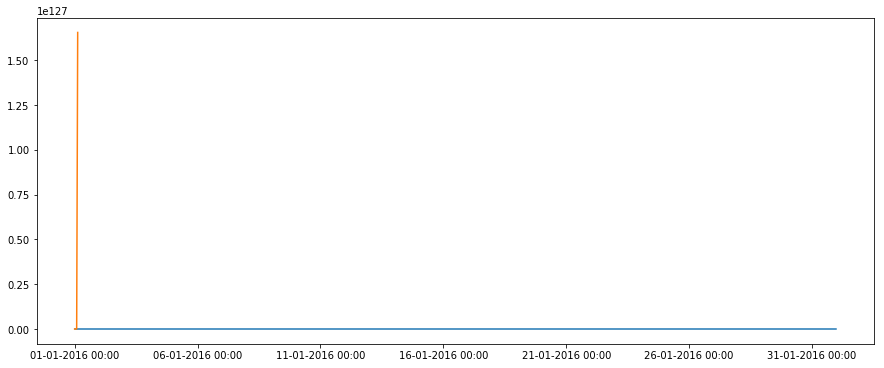

In [57]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(jan_ap)
plt.plot(predictions_ARIMA)
plt.xticks(np.arange(0, 744, 120.0))
print ("Test score Accuracy:", r2_score(jan_ap, predictions_ARIMA))